In [45]:
import pandas as pd
import csv
from config import ROOT_DIR
import sys
from tqdm import tqdm
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

tqdm.pandas()

In [10]:
csv.field_size_limit(sys.maxsize)

with open(ROOT_DIR / ".data" / "scrapped_articles.csv", 'r', encoding='utf-8', errors='replace') as infile, \
     open(ROOT_DIR / ".data" / "scrapped_articles_clean.csv", 'w', encoding='utf-8') as outfile:
    reader = csv.reader(infile)
    writer = csv.writer(outfile)
    for row in reader:
        try:
            writer.writerow(row)
        except Exception:  # log and skip
            print(f"Error writing row: {row}")
            continue

scrapped_df = pd.read_csv(ROOT_DIR / ".data" / "scrapped_articles_clean.csv")

In [84]:
cleaned_df = scrapped_df.copy()
cleaned_df

,website,title,url,content,domain,slop
0,NY Times,Submit a Crossword,https://www.nytimes.com/article/submit-crosswo...,"<html lang=""en"" class=""story nytapp-vi-article...",News,Non-Slop
1,NY Times,Part 3The Best-Laid Plans,https://www.nytimes.com/interactive/2025/03/29...,"<html lang=""en"" class=""nytapp-vi-interactive n...",News,Non-Slop
2,NY Times,"Part 4Breaches of Trust, and of Borders",https://www.nytimes.com/interactive/2025/03/29...,"<html lang=""en"" class=""nytapp-vi-interactive n...",News,Non-Slop
3,NY Times,Jack Dura/Associated Press,https://www.nytimes.com/2025/03/31/climate/gre...,"<html lang=""en"" class=""story nytapp-vi-article...",News,Non-Slop
4,NY Times,"Part 2‘When You Defeat Russia, We Will Make Yo...",https://www.nytimes.com/interactive/2025/03/29...,"<html lang=""en"" class=""nytapp-vi-interactive n...",News,Non-Slop
...,...,...,...,...,...,...
1268,Listverse,Animals,https://listverse.com/science-nature/animals/,"<html class=""no-js "" lang=""en-US""><!--<![endif...",Lifestyle,Slop
1269,Listverse,The Arts,https://listverse.com/entertainment/the-arts/,"<html class=""no-js "" lang=""en-US""><!--<![endif...",Lifestyle,Slop
1270,Listverse,Health,https://listverse.com/leisure-travel/health/,"<html class=""no-js "" lang=""en-US""><!--<![endif...",Lifestyle,Slop
1271,Listverse,Crime,https://listverse.com/people-politics/crime/,"<html class=""no-js "" lang=""en-US""><!--<![endif...",Lifestyle,Slop


## NA values

In [85]:
print(cleaned_df.isna().sum())
cleaned_df[cleaned_df.isna().any(axis=1)]

website      0
title        4
url          0
content    101
domain       0
slop         0
dtype: int64


,website,title,url,content,domain,slop
33,BBC News,Send a story,https://bbc.co.uk/news/articles/cp08467m0zzo,NaN,News,Non-Slop
34,BBC News,Three ways to cushion the blow of April bill r...,https://bbc.co.uk/news/articles/c15q5nvnqe9o,NaN,News,Non-Slop
36,BBC News,"Adolescence was hard to watch as a dad, Starme...",https://bbc.co.uk/news/articles/cx28neprdppo,NaN,News,Non-Slop
37,BBC News,Sentencing guidelines ditched after 'two-tier'...,https://bbc.co.uk/news/articles/c5yg887m6qdo,NaN,News,Non-Slop
38,BBC News,Virginia Giuffre in hospital after 'serious ac...,https://bbc.co.uk/news/articles/c5yl5vle2nmo,NaN,News,Non-Slop
...,...,...,...,...,...,...
1210,Popular Bio,Skip to content,#content,NaN,Lifestyle,Slop
1211,Popular Bio,Skip to navigation,#site-navigation,NaN,Lifestyle,Slop
1212,Popular Bio,NaN,#,NaN,Lifestyle,Slop
1213,Married Biography,Rachel Leviss: Meet the new boyfriend of this ...,https://marriedbiography.com/rachel-leviss-mee...,NaN,Lifestyle,Slop


In [86]:
cleaned_df = cleaned_df[~cleaned_df["content"].isna()]

cleaned_df["title"] = cleaned_df.apply(lambda row: row["website"] if pd.isna(row["title"]) else row["title"], axis=1)

/tmp/ipykernel_12287/1150250213.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["title"] = cleaned_df.apply(lambda row: row["website"] if pd.isna(row["title"]) else row["title"], axis=1)


## Duplicates

In [87]:
print(cleaned_df.duplicated(subset=["url"]).sum())
cleaned_df[cleaned_df.duplicated(subset=["url"], keep=False)]

1


,website,title,url,content,domain,slop
719,Wikipedia,https://en.wikipedia.org/w/index.php?title=Mai...,https://en.wikipedia.org/w/index.php?title=Mai...,"<html class=""client-js vector-feature-language...",Reference,Non-Slop
720,Wikipedia,Permanent link,https://en.wikipedia.org/w/index.php?title=Mai...,"<html class=""client-js vector-feature-language...",Reference,Non-Slop


In [88]:
cleaned_df.drop_duplicates(subset=["url"], inplace=True)

/tmp/ipykernel_12287/3523924717.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.drop_duplicates(subset=["url"], inplace=True)


## Clean HTML

In [89]:
def extract_text(html: str) -> list[str]:
    soup = BeautifulSoup(html, 'html.parser')
    return "\n".join([p.get_text(strip=True) for p in soup.find_all('p')])

cleaned_df["clean_content"] = cleaned_df["content"].progress_apply(extract_text)
cleaned_df

  0%|          | 0/1171 [00:00<?, ?it/s]

100%|██████████| 1171/1171 [02:55<00:00,  6.66it/s]
/tmp/ipykernel_12287/2521371739.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["clean_content"] = cleaned_df["content"].progress_apply(extract_text)


,website,title,url,content,domain,slop,clean_content
0,NY Times,Submit a Crossword,https://www.nytimes.com/article/submit-crosswo...,"<html lang=""en"" class=""story nytapp-vi-article...",News,Non-Slop,Advertisement\nSupported by\nThe New York Time...
1,NY Times,Part 3The Best-Laid Plans,https://www.nytimes.com/interactive/2025/03/29...,"<html lang=""en"" class=""nytapp-vi-interactive n...",News,Non-Slop,In the early days after Russia’s armies crosse...
2,NY Times,"Part 4Breaches of Trust, and of Borders",https://www.nytimes.com/interactive/2025/03/29...,"<html lang=""en"" class=""nytapp-vi-interactive n...",News,Non-Slop,In the early days after Russia’s armies crosse...
3,NY Times,Jack Dura/Associated Press,https://www.nytimes.com/2025/03/31/climate/gre...,"<html lang=""en"" class=""story nytapp-vi-article...",News,Non-Slop,Advertisement\nSupported by\nA pipeline compan...
4,NY Times,"Part 2‘When You Defeat Russia, We Will Make Yo...",https://www.nytimes.com/interactive/2025/03/29...,"<html lang=""en"" class=""nytapp-vi-interactive n...",News,Non-Slop,In the early days after Russia’s armies crosse...
...,...,...,...,...,...,...,...
1268,Listverse,Animals,https://listverse.com/science-nature/animals/,"<html class=""no-js "" lang=""en-US""><!--<![endif...",Lifestyle,Slop,Jamie Frater\nHead Editor\nJamie founded Listv...
1269,Listverse,The Arts,https://listverse.com/entertainment/the-arts/,"<html class=""no-js "" lang=""en-US""><!--<![endif...",Lifestyle,Slop,Jamie Frater\nHead Editor\nJamie founded Listv...
1270,Listverse,Health,https://listverse.com/leisure-travel/health/,"<html class=""no-js "" lang=""en-US""><!--<![endif...",Lifestyle,Slop,Jamie Frater\nHead Editor\nJamie founded Listv...
1271,Listverse,Crime,https://listverse.com/people-politics/crime/,"<html class=""no-js "" lang=""en-US""><!--<![endif...",Lifestyle,Slop,Jamie Frater\nHead Editor\nJamie founded Listv...


## Text Length

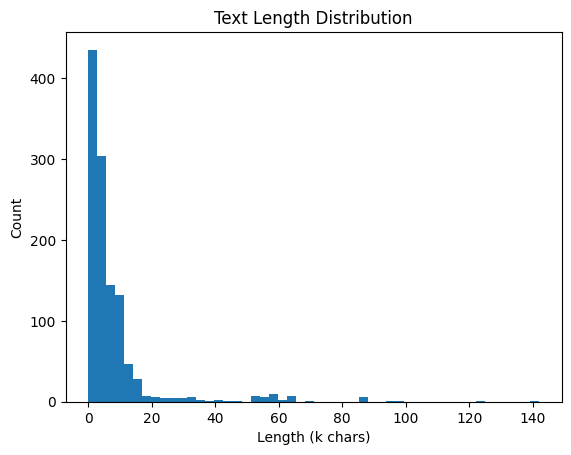

In [90]:
plt.hist(cleaned_df["clean_content"].str.len()/1000, bins=50)
plt.xlabel("Length (k chars)")
plt.ylabel("Count")
plt.title("Text Length Distribution")
plt.show()

In [91]:
cleaned_df = cleaned_df[cleaned_df["clean_content"].str.len() >= 1000]

In [100]:
for i in cleaned_df[cleaned_df["clean_content"].str.len() < 1200].itertuples():
    print(i.clean_content)
    print("-"*50)

Catch up on global daily news
Dive into compelling long reads
Tune into engaging conversations
Watch engaging short films
Gain insights from experts
Curated news, direct to your inbox
Unlimited digital access to all reporting, podcasts, newsletters and events
To read more of The Economist’s data journalism visit ourGraphic detailpage.
A daily newsletter with the best of our journalism
Our polling shows that Americans’ and Europeans’ attitudes towards each other are changing quickly
National identities and rivalries still drive changes
What are they, how are they used and where are they found?
Did it live up to its promises?
What’s their secret?
In one country American aid is the equivalent of almost 350% of the government’s health spending
To enhance your experience and ensure our website runs smoothly, we use cookies and similar technologies.
Registered in England and Wales. No. 236383 | Registered office: The Adelphi, 1-11 John Adam Street, London, WC2N 6HT | VAT Reg No: GB 340 436 8

In [93]:
cleaned_df

,website,title,url,content,domain,slop,clean_content
0,NY Times,Submit a Crossword,https://www.nytimes.com/article/submit-crosswo...,"<html lang=""en"" class=""story nytapp-vi-article...",News,Non-Slop,Advertisement\nSupported by\nThe New York Time...
1,NY Times,Part 3The Best-Laid Plans,https://www.nytimes.com/interactive/2025/03/29...,"<html lang=""en"" class=""nytapp-vi-interactive n...",News,Non-Slop,In the early days after Russia’s armies crosse...
2,NY Times,"Part 4Breaches of Trust, and of Borders",https://www.nytimes.com/interactive/2025/03/29...,"<html lang=""en"" class=""nytapp-vi-interactive n...",News,Non-Slop,In the early days after Russia’s armies crosse...
3,NY Times,Jack Dura/Associated Press,https://www.nytimes.com/2025/03/31/climate/gre...,"<html lang=""en"" class=""story nytapp-vi-article...",News,Non-Slop,Advertisement\nSupported by\nA pipeline compan...
4,NY Times,"Part 2‘When You Defeat Russia, We Will Make Yo...",https://www.nytimes.com/interactive/2025/03/29...,"<html lang=""en"" class=""nytapp-vi-interactive n...",News,Non-Slop,In the early days after Russia’s armies crosse...
...,...,...,...,...,...,...,...
1253,Listverse,Ten Disturbing News Stories Involving Chatbots,https://listverse.com/2025/04/02/ten-disturbin...,"<html class=""no-js "" lang=""en-US""><!--<![endif...",Lifestyle,Slop,Jamie Frater\nHead Editor\nJamie founded Listv...
1254,Listverse,10 Times Patriotism Influenced Pop Culture,https://listverse.com/2025/03/30/10-times-patr...,"<html class=""no-js "" lang=""en-US""><!--<![endif...",Lifestyle,Slop,Jamie Frater\nHead Editor\nJamie founded Listv...
1255,Listverse,10 Greatest Movie MacGuffins Of All Time,https://listverse.com/2017/10/25/10-greatest-m...,"<html class=""no-js "" lang=""en-US""><!--<![endif...",Lifestyle,Slop,Jamie Frater\nHead Editor\nJamie founded Listv...
1256,Listverse,10 Fictional Bands with Real Hit Songs,https://listverse.com/2025/03/31/10-fictional-...,"<html class=""no-js "" lang=""en-US""><!--<![endif...",Lifestyle,Slop,Jamie Frater\nHead Editor\nJamie founded Listv...


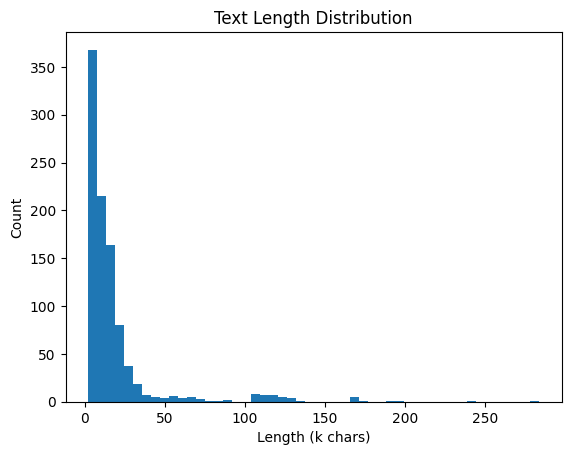

In [94]:
plt.hist(cleaned_df["clean_content"].str.len()/500, bins=50)
plt.xlabel("Length (k chars)")
plt.ylabel("Count")
plt.title("Text Length Distribution")
plt.show()

## Class Imbalance

In [95]:
print(cleaned_df["slop"].value_counts())

slop
Slop        501
Non-Slop    462
Name: count, dtype: int64


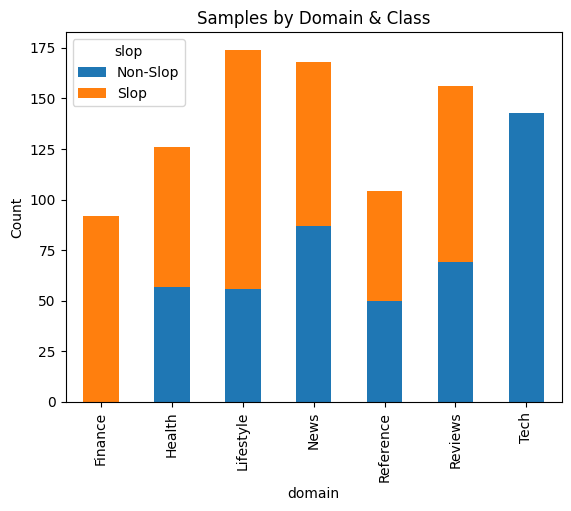

In [96]:
cleaned_df.groupby(["domain","slop"]).size().unstack(fill_value=0).plot.bar(stacked=True)
plt.ylabel("Count")
plt.title("Samples by Domain & Class")
plt.show()